## Some Basics of Running Regression in Python

In [3]:
import statsmodels 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#### 1. Explort the time series data 

In [5]:
data = pd.read_csv('AirPassengers.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


The data contains a particular month and number of passengers travelling in that month. But this is still not read as a TS object as the data types are ‘object’ and ‘int’. In order to read the data as a time series, we have to pass special arguments to the read_csv command:

In [18]:
## use pandas apply, to transfrom time variable to datetime datatype, equient to tsset in stata
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data["t_month"] = data["Month"].apply(dateparse)
print data.head()
print '\n Data Types:'
print data.dtypes

     Month  #Passengers    t_month
0  1949-01          112 1949-01-01
1  1949-02          118 1949-02-01
2  1949-03          132 1949-03-01
3  1949-04          129 1949-04-01
4  1949-05          121 1949-05-01

 Data Types:
Month                  object
#Passengers             int64
t_month        datetime64[ns]
dtype: object


In [25]:
## assign the index to be the time variable 
data.index = data["t_month"]
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u't_month', length=144, freq=None)

### 2. Check stationarity of a time series

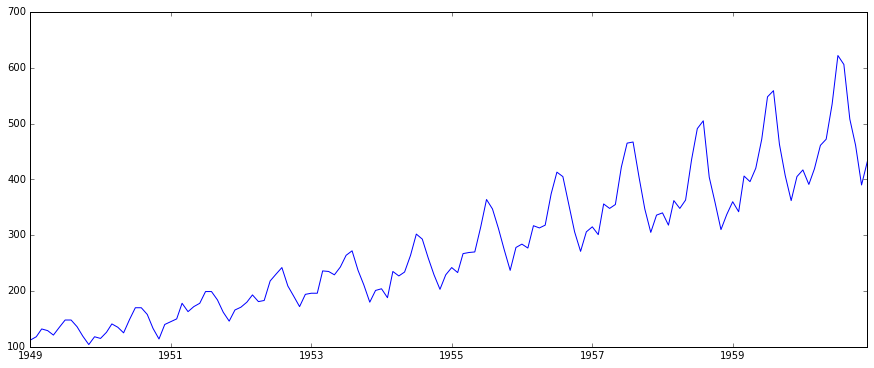

In [30]:
ts = data["#Passengers"]
plt.plot(ts)

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences (we’ll see such cases later).

#### We can formally test stationarity using: Plotting Rolling Statistics and Dickey-Fuller Test

In [34]:
import statsmodels.tsa.stattools as tsa

<Container object of 51 artists>

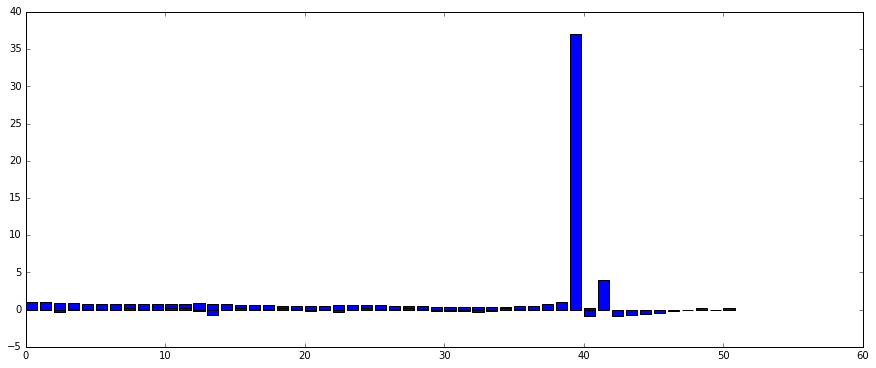

In [45]:
### how to create Correlogram
acf = tsa.acf(ts,50)
x = range(len(acf))
width=1/1.5
plt.bar(x,acf)

<Container object of 51 artists>

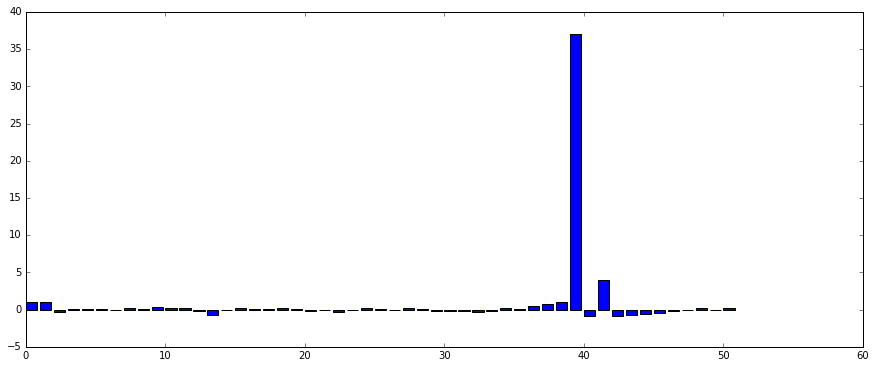

In [46]:
## PACF
pacf = tsa.pacf(ts,50)
x1 = range(len(pacf))
width=1/1.5
plt.bar(x1,pacf)